### Student Information
Name: 林家銘

Student ID: 111062661

GitHub ID: jeremylin168

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part 1

In [34]:
### Begin Assignment Here
from sklearn.datasets import fetch_20newsgroups
import os
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

os.chdir(os.getcwd())
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [18]:
#Answer here
print(X['category_name'][:5])

0             comp.graphics
1             comp.graphics
2    soc.religion.christian
3    soc.religion.christian
4    soc.religion.christian
Name: category_name, dtype: object


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [19]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [20]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
# Answer here
# The null data is recorded as string type data. However, the isnull function only detected the real 'NULL' data. At the end, the string type 'Null' data will not detected by isnull function.

In [21]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
# First, X_samle dataframe size is reduced to 1000. Second, sample function shuffle the data. The leftest data order number shows that.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

Index(['sci.med', 'soc.religion.christian', 'comp.graphics', 'alt.atheism'], dtype='object')


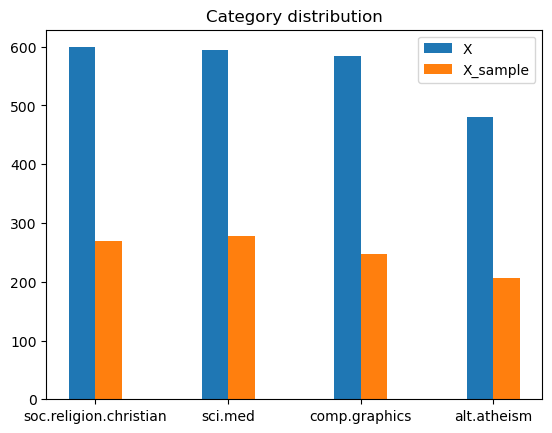

"X.category_name.value_counts().plot(kind = 'bar',\n                                    title = 'Category distribution',\n                                    ylim = [0, 700],        \n                                    rot = 0, fontsize = 11, figsize = (8,3))\nX_sample.category_name.value_counts().plot(kind = 'bar',\n                                           title = 'Category distribution',\n                                           ylim = [0, 300], \n                                           rot = 0, fontsize = 12, figsize = (8,3))"

In [22]:
# Answer here
print(X_sample.category_name.value_counts().index)
x = np.arange(len(X_sample.category_name.value_counts().index))
width = 0.2
plt.title('Category distribution')
plt.bar(X.category_name.value_counts().index, X.category_name.value_counts(), -width, label='X', align='edge')
plt.bar(X_sample.category_name.value_counts().index, X_sample.category_name.value_counts(), width, label='X_sample', align='edge')

plt.legend()
plt.show()


# plot barchart for X
"""X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))"""

In [24]:
# feature creation
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

# Count  vector
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
analyze = count_vect.build_analyzer()
print(analyze("I am craving for a hawaiian pizza right now"))


(2257, 35788)
['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [25]:
# Answer here
print(type(X_counts[0:5, 0:100]))
print(X_counts[0:5, 0:100].indices)
print(X_counts[0:5, 0:100].data)
for i in X_counts[0:5, 0:100].indices:
    print(count_vect.get_feature_names_out()[i])
# this vocabulary : '01'

<class 'scipy.sparse._csr.csr_matrix'>
[ 0 37]
[1 1]
00
01


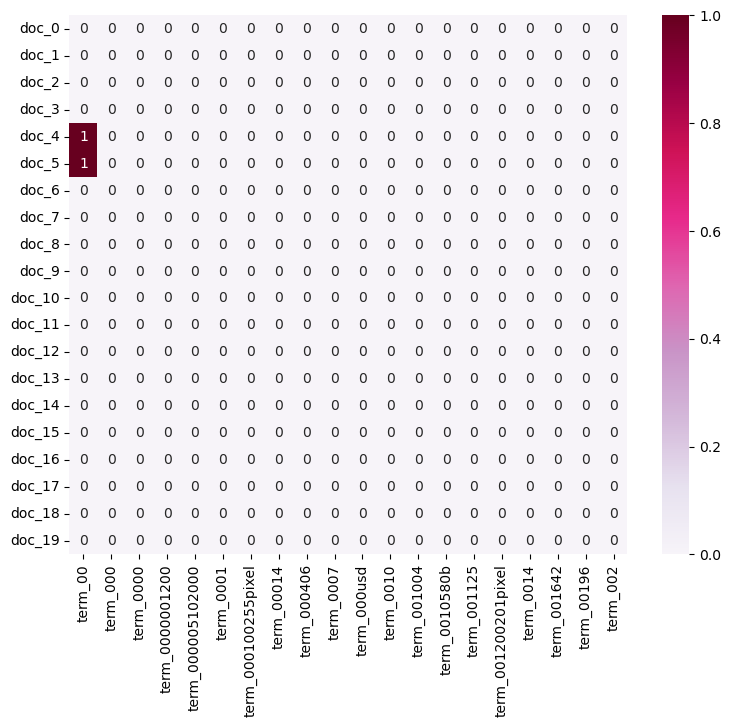

In [28]:
# plot
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

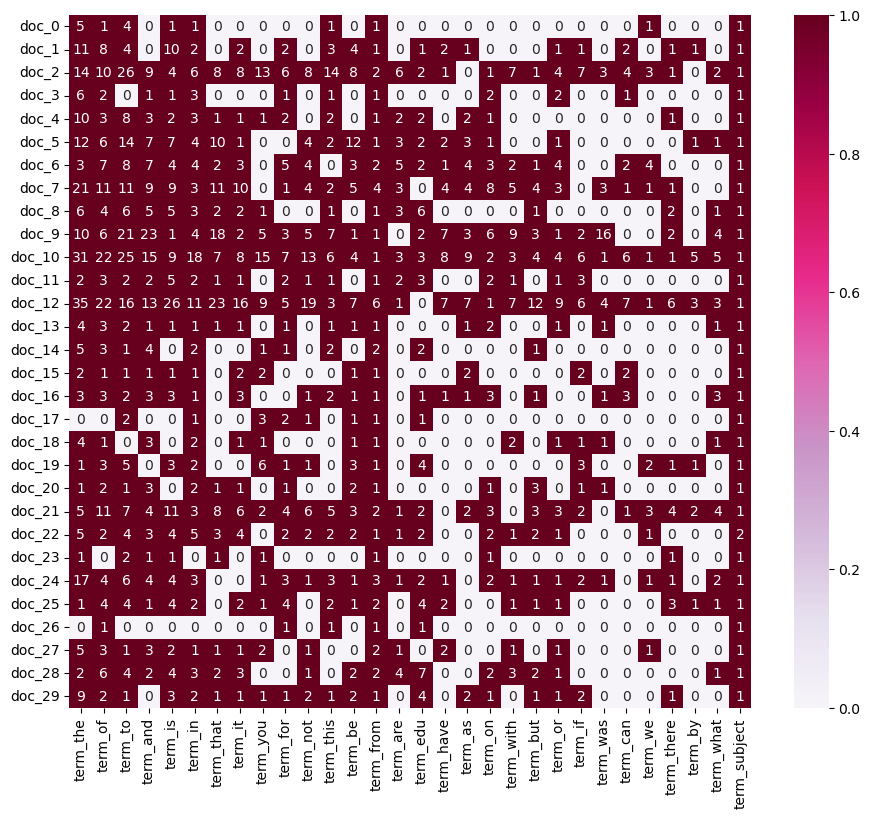

In [71]:
# Answer here
#Find top 30 term frequency words. It may take some time.
t_df = pd.DataFrame(np.zeros(X_counts.shape[1]))
for i in range(X_counts.shape[0]):
    for j in X_counts[i].indices:
       t_df.loc[j] =  t_df.loc[j] + X_counts[i, j]

# sort
tp_df = t_df.sort_values(by=0, ascending=False)

#get document data
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:30]]
plot_z = X_counts[0:30, :].toarray() 

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index=plot_y)
n_df_todraw = df_todraw.iloc[:,tp_df.index[:30]]

#draw
plt.subplots(figsize=(11, 9))
ax = sns.heatmap(n_df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()



In [30]:
# PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 2)


### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


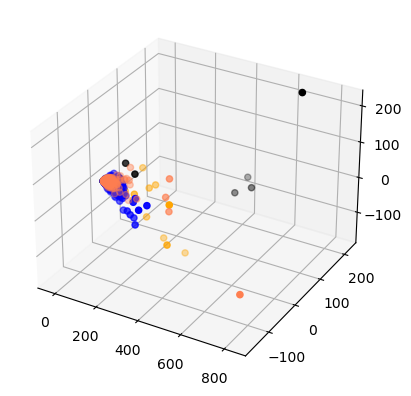

In [31]:
# Answer here
n_X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(n_X_reduced.shape)

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = n_X_reduced[X['category_name'] == category].T[0]
    ys = n_X_reduced[X['category_name'] == category].T[1]
    zs = n_X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

#ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
#ax.set_xlabel('\nX Label')
#ax.set_ylabel('\nY Label')

plt.show()

In [32]:
# term frequency
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

35788


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [35]:
# Answer here
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])],
    layout_title_text="ploty figure"
)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


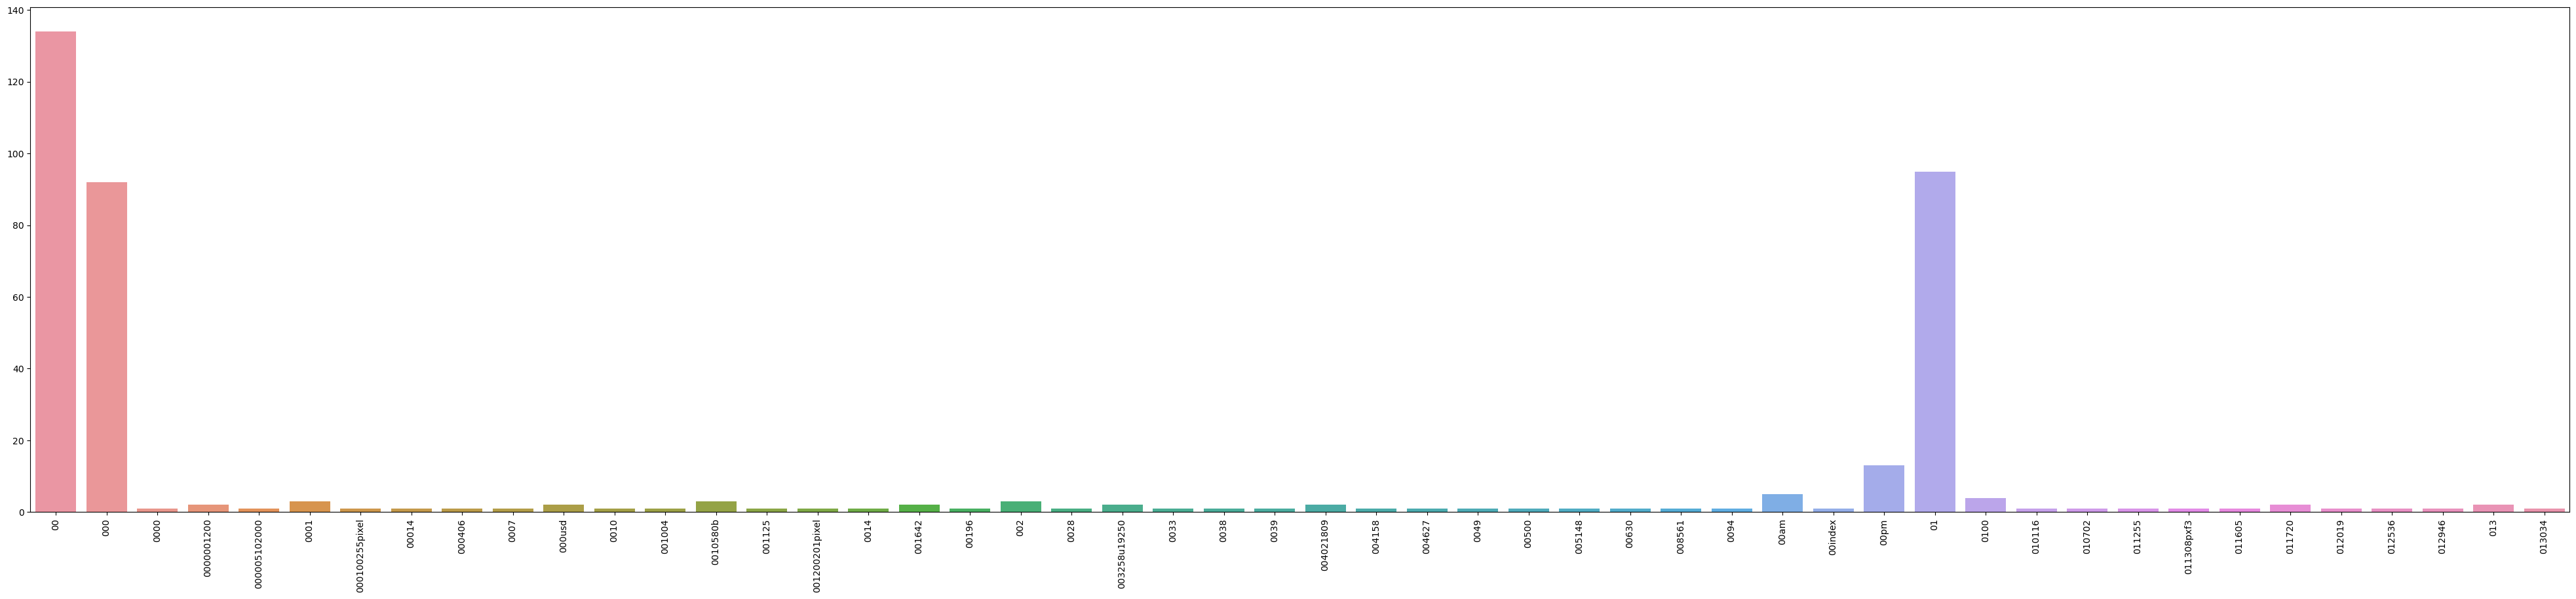

In [36]:
# Answer here
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:50], 
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names_out()[:50], rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

       term_frequencies feature_names
32142             29825           the
23610             17660            of
32493             17222            to
4992              13017           and
18474             12343            is


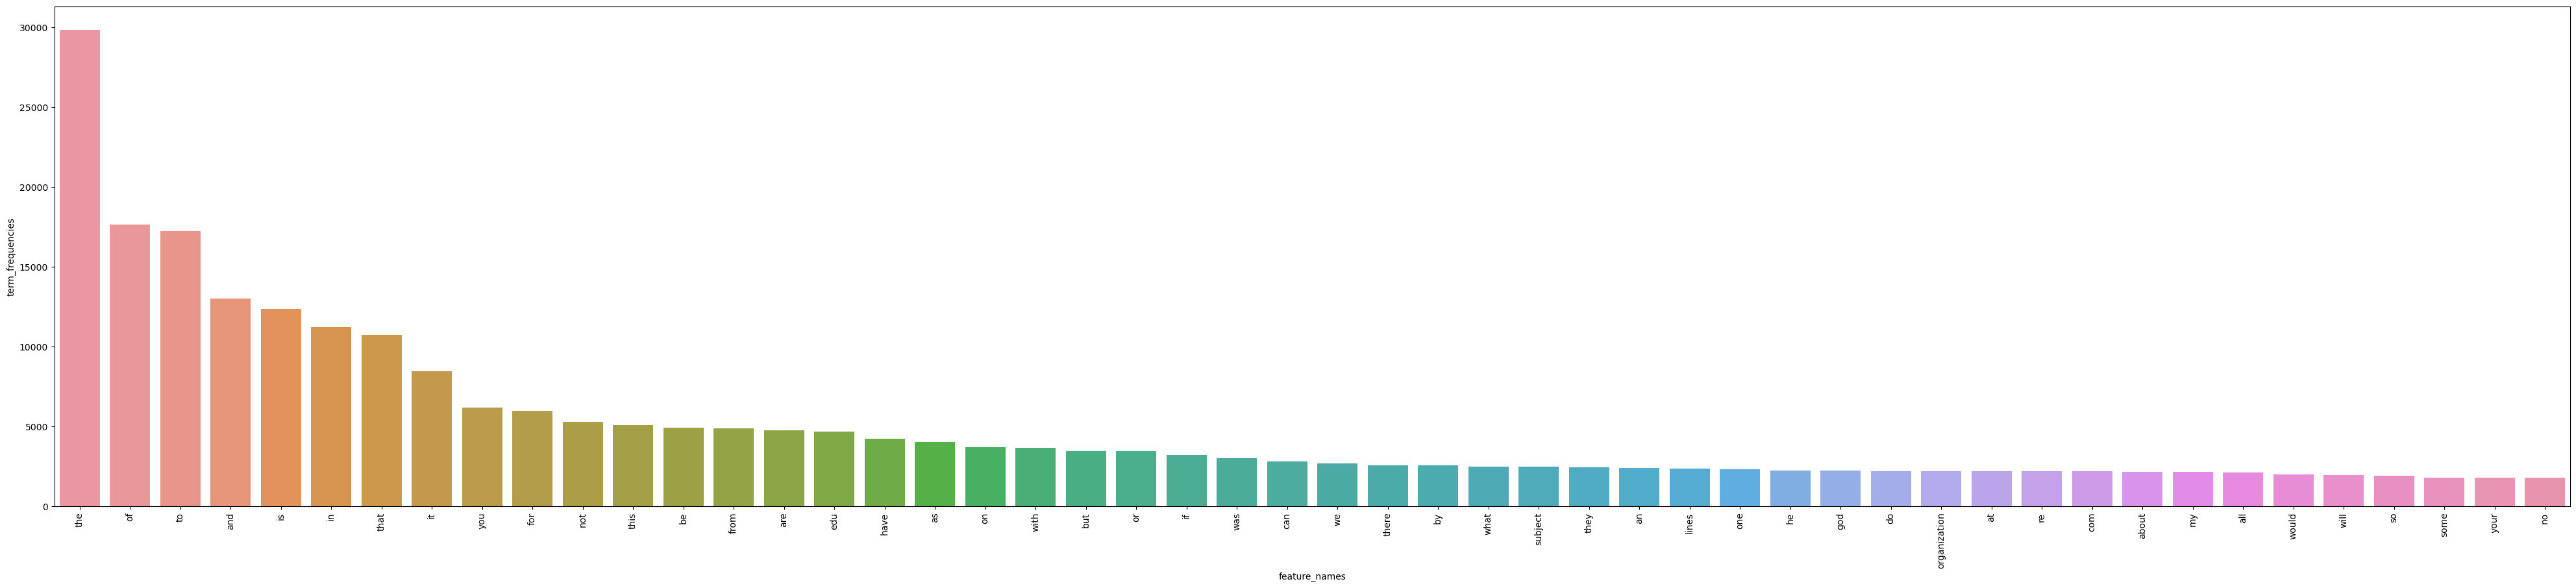

In [37]:
# Answer here
n_df = pd.DataFrame(term_frequencies, columns=['term_frequencies'])
n_df['feature_names'] = count_vect.get_feature_names_out()
#print(n_df.head())
sorted_df =n_df.sort_values(by=['term_frequencies'], ascending=False)
print(sorted_df.head())
#sorted_df.head()

plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sorted_df.feature_names[:50], 
            y=sorted_df.term_frequencies[:50])
g.set_xticklabels(sorted_df.feature_names[:50], rotation = 90);




In [38]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
print(X[0:9])

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.chr

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [39]:
# Answer here
n_mlb = preprocessing.LabelBinarizer()
print(X.category_name)
n_mlb.fit(X.category_name)
print(n_mlb.transform(X['category_name']).tolist())
# Yes. It works.

0                comp.graphics
1                comp.graphics
2       soc.religion.christian
3       soc.religion.christian
4       soc.religion.christian
                 ...          
2252                   sci.med
2253                   sci.med
2254                   sci.med
2255                   sci.med
2256                   sci.med
Name: category_name, Length: 2257, dtype: object
[[0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 

# Part 2

In [1]:
#load lib
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load file
text_list = []

with open("./amazon_cells_labelled.txt") as f:
    for line in f:
        text_list.append([line[:-2].strip().lower(), int(line[-2]), 'positive' if int(line[-2]) else 'negative'])

with open("./imdb_labelled.txt") as f:
    for line in f:
        text_list.append([line[:-2].strip().lower(), int(line[-2]), 'positive' if int(line[-2]) else 'negative'])
with open("./yelp_labelled.txt") as f:
    for line in f:
        text_list.append([line[:-2].strip().lower(), int(line[-2]), 'positive' if int(line[-2]) else 'negative' ])
        
# convert to dataframe
df = pd.DataFrame(text_list, columns=['text', 'label', 'label_name'])  
print(df)

                                                   text  label label_name
0     so there is no way for me to plug it in here i...      0   negative
1                           good case, excellent value.      1   positive
2                                great for the jawbone.      1   positive
3     tied to charger for conversations lasting more...      0   negative
4                                     the mic is great.      1   positive
...                                                 ...    ...        ...
2995  i think food should have flavor and texture an...      0   negative
2996                           appetite instantly gone.      0   negative
2997  overall i was not impressed and would not go b...      0   negative
2998  the whole experience was underwhelming, and i ...      0   negative
2999  then, as if i hadn't wasted enough of my life ...      0   negative

[3000 rows x 3 columns]


In [3]:
#check and remove duplicated data
print(sum(df.duplicated()))
df = df.drop_duplicates(keep=False).reset_index(drop=True)
print(len(df))

21
2960


In [4]:
#check missing variable
print(df.isnull())
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

       text  label  label_name
0     False  False       False
1     False  False       False
2     False  False       False
3     False  False       False
4     False  False       False
...     ...    ...         ...
2955  False  False       False
2956  False  False       False
2957  False  False       False
2958  False  False       False
2959  False  False       False

[2960 rows x 3 columns]
                                 text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_name  
0  The amoung of missing records is:   
1                                   0  


In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=55)


# Part 3

### 3-1

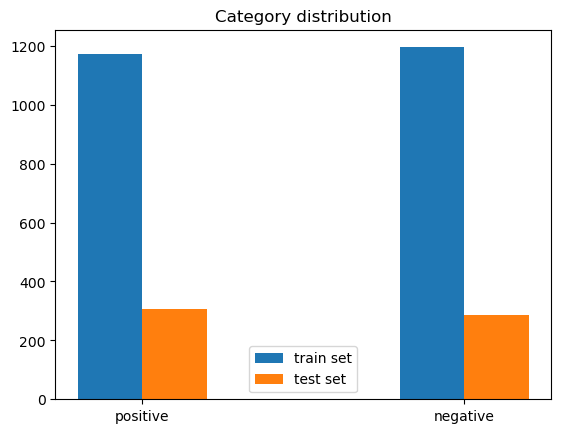

In [6]:
# Check data is even or not.
width = 0.2
plt.title('Category distribution')
plt.bar(['positive', 'negative'], [sum(y_train), len(y_train)-sum(y_train)], -width, label='train set', align='edge')
plt.bar(['positive', 'negative'], [sum(y_test), len(y_test)-sum(y_test)], width, label='test set', align='edge')
plt.legend()
plt.show()

['runner', 'like', 'run', 'thu', 'run']


### 3-2

In [7]:
# train tf-idf vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)
print(len(x_train))
print(len(vectorizer.get_feature_names_out()))

#apply tf-idf vectorizer to text
vec_df = pd.DataFrame(y_train, columns=['label']).reset_index(drop=True)

vec_df = pd.concat([vec_df, pd.DataFrame(vectorizer.transform(x_train).toarray(), columns=["text_"+i for i in vectorizer.get_feature_names_out()])], axis=1)
print(vec_df)

2368
4505
      label  text_00  text_10  text_100  text_11  text_12  text_13  text_15  \
0         1      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
1         1      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2         0      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
3         0      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
4         0      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
...     ...      ...      ...       ...      ...      ...      ...      ...   
2363      1      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2364      0      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2365      1      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2366      0      0.0      0.0       0.0      0.0      0.0      0.0      0.0   
2367      1      0.0      0.0       0.0      0.0      0.0      0.0      0.0   

      text_15g  text_17  ...  text_youthf

In [8]:
# count word 
count_vect = CountVectorizer()
X_counts = count_vect.fit(x_train) 

# transform
con_df = pd.DataFrame(y_train, columns=['label']).reset_index(drop=True)

con_df = pd.concat([con_df, pd.DataFrame(count_vect.transform(x_train).toarray(),columns=["text_"+i for i in vectorizer.get_feature_names_out()])], axis=1)
print(con_df)

      label  text_00  text_10  text_100  text_11  text_12  text_13  text_15  \
0         1        0        0         0        0        0        0        0   
1         1        0        0         0        0        0        0        0   
2         0        0        0         0        0        0        0        0   
3         0        0        0         0        0        0        0        0   
4         0        0        0         0        0        0        0        0   
...     ...      ...      ...       ...      ...      ...      ...      ...   
2363      1        0        0         0        0        0        0        0   
2364      0        0        0         0        0        0        0        0   
2365      1        0        0         0        0        0        0        0   
2366      0        0        0         0        0        0        0        0   
2367      1        0        0         0        0        0        0        0   

      text_15g  text_17  ...  text_youthful  text_y

### 3-3

In [9]:
#train Multinomial Naive Bayes classifier for TF-IDF vectorizer and count vectorizer
tfidf_clf = MultinomialNB()
tfidf_clf.fit(vec_df.iloc[:,1:], vec_df['label'])

con_clf = MultinomialNB()
con_clf.fit(con_df.iloc[:,1:], con_df['label'])

MultinomialNB()

In [10]:
# result and accuracy
tfidf_pre = tfidf_clf.predict(vectorizer.transform(x_test))
con_pre = con_clf.predict(count_vect.transform(x_test))

#tfidf
print("Tf-IDF accuracy:")
print(accuracy_score(y_test, tfidf_pre))
print("Tf-IDF confusion matrix:")
tn, fp, fn, tp = confusion_matrix(y_test, tfidf_pre).ravel()
print(tn, fp)
print(fn, tp)
print()

#count vector
print("Count Vector accuracy:")
print(accuracy_score(y_test, con_pre))
print("Count Vector confusion matrix:")
tn, fp, fn, tp = confusion_matrix(y_test, con_pre).ravel()
print(tn, fp)
print(fn, tp)

Tf-IDF accuracy:
0.839527027027027
Tf-IDF confusion matrix:
242 45
50 255

Count Vector accuracy:
0.8243243243243243
Count Vector confusion matrix:
232 55
49 256


c:\Users\jerem\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


# Part 4

In [11]:
# In the preprocessing, when we deal with text data, we seen different form of a word as different features. For example, 'sock' and 'socks' we seen them as different word. 
# In order to deal with this problem. We can do stemming to generalize the word.
# And we can also remove the stop word, which means the words often appear in most articles. Like 'the', 'I', 'they', 'a', etc.
# Stop words removal and tokenizer
stop = stopwords.words('english')

def tokenizer_stem_nostop(text):
    text = RegexpTokenizer(r'\w+').tokenize(text.lower().strip())
    porter = PorterStemmer()
    return [porter.stem(w) for w in text if w not in stop ]

print(tokenizer_stem_nostop('[runners like running and thus they run.]'))

['runner', 'like', 'run', 'thu', 'run']


In [12]:
# train tf-idf vectorizer with stemming and tokenizer
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), tokenizer = tokenizer_stem_nostop)
vectorizer.fit(x_train)
print(len(x_train))
print(len(vectorizer.get_feature_names_out()))

#apply tf-idf vectorizer to text
vec_df = pd.DataFrame(y_train, columns=['label']).reset_index(drop=True)

vec_df = pd.concat([vec_df, pd.DataFrame(vectorizer.transform(x_train).toarray(), columns=["text_"+i for i in vectorizer.get_feature_names_out()])], axis=1)
print(vec_df)

c:\Users\jerem\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2368
3476
      label  text_0  text_00  text_1  text_10  text_100  text_11  text_12  \
0         1     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
1         1     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
2         0     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
3         0     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
4         0     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
...     ...     ...      ...     ...      ...       ...      ...      ...   
2363      1     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
2364      0     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
2365      1     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
2366      0     0.0      0.0     0.0      0.0       0.0      0.0      0.0   
2367      1     0.0      0.0     0.0      0.0       0.0      0.0      0.0   

      text_13  text_15  ...  text_yucki  text_yum  text_yummi  te

In [13]:
#train Multinomial Naive Bayes classifier for TF-IDF vectorizer and count vectorizer
tfidf_clf = MultinomialNB()
tfidf_clf.fit(vec_df.iloc[:,1:], vec_df['label'])

con_clf = MultinomialNB()
con_clf.fit(con_df.iloc[:,1:], con_df['label'])

MultinomialNB()

In [14]:
# result and accuracy
tfidf_pre = tfidf_clf.predict(vectorizer.transform(x_test))
con_pre = con_clf.predict(count_vect.transform(x_test))

#tfidf
print("Tf-IDF accuracy:")
print(accuracy_score(y_test, tfidf_pre))
print("Tf-IDF confusion matrix:")
tn, fp, fn, tp = confusion_matrix(y_test, tfidf_pre).ravel()
print(tn, fp)
print(fn, tp)
print()

#count vector
print("Count Vector accuracy:")
print(accuracy_score(y_test, con_pre))
print("Count Vector confusion matrix:")
tn, fp, fn, tp = confusion_matrix(y_test, con_pre).ravel()
print(tn, fp)
print(fn, tp)

Tf-IDF accuracy:
0.8243243243243243
Tf-IDF confusion matrix:
229 58
46 259

Count Vector accuracy:
0.8243243243243243
Count Vector confusion matrix:
232 55
49 256


c:\Users\jerem\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
